In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras.layers import *

train_dir ='/content/New folder (2)/train'
test_dir = '/content/New folder (2)/test'
val_dir = '/content/New folder (2)/valid'

size = 200
cmode = "sparse"

train_gen = ImageDataGenerator(
    rescale=1 / 255.0,
    horizontal_flip=True,
    zoom_range=0.20,)


train_ds = train_gen.flow_from_directory(train_dir, target_size=(size, size), class_mode=cmode, batch_size=32)


val_gen = ImageDataGenerator(rescale=1 / 255.0)

val_ds = val_gen.flow_from_directory(val_dir, target_size=(size, size),  class_mode=cmode, batch_size=32)

test_gen = ImageDataGenerator(rescale=1 / 255.0)
test_ds = test_gen.flow_from_directory(test_dir, target_size=(size, size),  class_mode=cmode, batch_size=32)


Found 4883 images belonging to 2 classes.
Found 349 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
len(train_ds.classes)

4883

In [6]:
spe = 4883/32
vspe = 349/32

cls_names = list(train_ds.class_indices)

img_config = dict(cls_names=cls_names, size = train_ds.target_size)
img_config                 

{'cls_names': ['NORMAL', 'PNEUMONIA'], 'size': (200, 200)}

In [ ]:
import tensorflow as tf
n_cls = len(cls_names)
fm = tf.keras.Sequential()

fm.add(Conv2D(62, 3, padding='same', activation='relu', input_shape = (size,size,3)))
fm.add(Conv2D(62, 3, padding='same', activation='relu',))
fm.add(MaxPool2D())

fm.add(Conv2D(32, 3, padding='same', activation='relu',))
fm.add(Conv2D(64, 3, padding='same', activation='relu',))
fm.add(MaxPool2D())
fm.add(Flatten())

fm.add(Dense(32, activation='relu'))
fm.add(Dense(64, activation='relu'))
#op
fm.add(Dense(n_cls, activation='softmax'))


In [ ]:
model_path = "/content/drive/MyDrive/models/CoronaCT_V2.h5"
# model_chkpt = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
chkpt = tf.keras.callbacks.ModelCheckpoint(filepath=model_path, monitor='val_accuracy', mode='max', save_best_only=True, save_weights_only=False, verbose=1)
fm.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)  , metrics=['accuracy'])


In [ ]:
H = fm.fit(
    train_ds,
    validation_data=val_ds,
    verbose=1,
    steps_per_epoch=spe,
    validation_steps = vspe,
    epochs=30,
    batch_size=32,
    callbacks = [chkpt])

Epoch 1/30
152/152 [==============================] - 120s 750ms/step - loss: 0.3599 - accuracy: 0.8329 - val_loss: 0.3334 - val_accuracy: 0.8797

Epoch 00001: val_accuracy improved from -inf to 0.87966, saving model to /content/drive/MyDrive/models/CoronaCT_V2.h5
Epoch 2/30
152/152 [==============================] - 108s 707ms/step - loss: 0.2466 - accuracy: 0.8976 - val_loss: 0.3448 - val_accuracy: 0.8682

Epoch 00002: val_accuracy did not improve from 0.87966
Epoch 3/30
152/152 [==============================] - 109s 712ms/step - loss: 0.2014 - accuracy: 0.9242 - val_loss: 0.2064 - val_accuracy: 0.9083

Epoch 00003: val_accuracy improved from 0.87966 to 0.90831, saving model to /content/drive/MyDrive/models/CoronaCT_V2.h5
Epoch 4/30
152/152 [==============================] - 109s 714ms/step - loss: 0.1920 - accuracy: 0.9261 - val_loss: 0.2031 - val_accuracy: 0.9140

Epoch 00004: val_accuracy improved from 0.90831 to 0.91404, saving model to /content/drive/MyDrive/models/CoronaCT_V2.

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/models/CoronaCT_V1.h5")

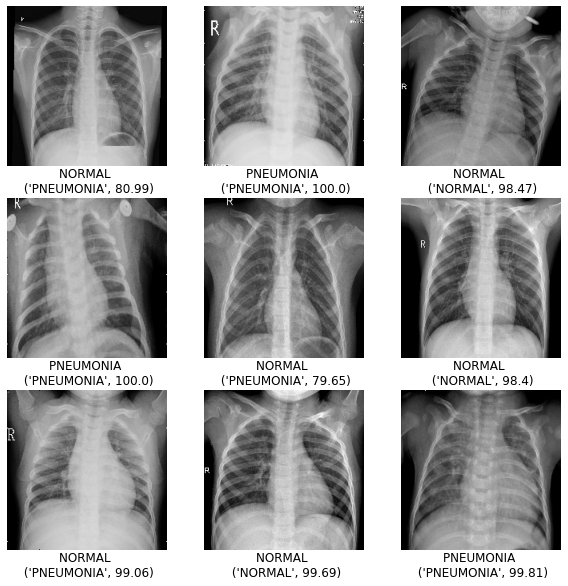

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plt_pred(model_name, IMG, conf_file):
    img = np.expand_dims(IMG, axis=0)
    pred = model.predict(img)
    score = np.max(pred)*100
    result = np.argmax(pred)
    cls_names = conf_file['cls_names']
    result = cls_names[result]
    score = round(score,2)
    return result,score



image_batch, label_batch = next(iter(test_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i])
  actu_label = img_config['cls_names'][int(label_batch[i])]
  pred_l = plt_pred(fm, image_batch[i], img_config)
  ax.set_title(f'{actu_label} \n {pred_l}', y=-0.2)
  plt.axis("off")


In [10]:
import tensorflow as tf
m1 = "/content/drive/MyDrive/models/CoronaCT_V1.h5"
m2 = "/content/drive/MyDrive/models/CoronaCT_V2.h5"

m1 = tf.keras.models.load_model(m1)
m2 = tf.keras.models.load_model(m2)


In [11]:
m1.evaluate(test_ds)

20/20 [==============================] - 55s 3s/step - loss: 0.3608 - accuracy: 0.9199


[0.3607548475265503, 0.9198718070983887]

In [ ]:
m2.evaluate(test_ds)

15/20 [=====================>........] - ETA: 14s - loss: 0.3385 - accuracy: 0.9208